In [3]:
import pandas as pd

In [4]:
df_collection=pd.read_csv("../../data/processed/all_data_collection.csv")

In [5]:
df_collection

Date  tech_index_daily_pro_change  cop_daily_pro_change  \
0     2014-01-02                    -0.751953             -0.352994   
1     2014-01-03                    -0.522898             -0.783676   
2     2014-01-06                    -0.022589              0.134128   
3     2014-01-07                     0.905810              0.000000   
4     2014-01-08                    -0.198846             -0.506028   
...          ...                          ...                   ...   
2563  2024-10-24                     0.014143              0.886590   
2564  2024-10-25                     0.589392             -0.073233   
2565  2024-10-28                     0.079416              0.000000   
2566  2024-10-29                     0.999780             -0.073287   
2567  2024-10-30                    -0.477318             -0.110011   

      gold_daily_pro_change  silv_daily_pro_change  pal_daily_pro_change  \
0                 -0.105993               3.539095              0.828394   
1                  0.000000               0.000000              0.130092   
2                  1.044727              -0.124205              0.998359   
3                 -0.678514              -1.571905              0.433311   
4                 -0.333442              -1.253348             -0.458406   
...                     ...                    ...                   ...   
2563               0.713997              -0.130653              7.209738   
2564               0.208295              -0.038653              2.969432   
2565               0.051054               0.666270            -98.982188   
2566               0.918501               1.273490           9891.666667   
2567               1.155735              -0.583516             -5.921601   

      plat_daily_pro_change  crude_oil_daily_pro_change  fed_dff_daily  \
0                  1.134643                   -3.106599           0.08   
1                  0.683469                   -1.550712           0.08   
2                  0.155565                   -0.564070           0.08   
3                 -0.070602                    0.256877           0.07   
4                 -0.084782                   -1.430554           0.07   
...                     ...                         ...            ...   
2563               0.382858                   -0.753162           4.83   
2564              -0.168621                    2.162085           4.83   
2565               0.847772                   -6.124737           4.83   
2566               1.759734                   -0.253807           4.83   
2567              -4.042113                    2.050591           4.83   

      ppi314_monthly_pro_change  ppi332_monthly_pro_change  \
0                      2.827965                   0.267809   
1                      2.827965                   0.267809   
2                      2.827965                   0.267809   
3                      2.827965                   0.267809   
4                      2.827965                   0.267809   
...                         ...                        ...   
2563                  -0.554093                   0.212418   
2564                  -0.554093                   0.212418   
2565                  -0.554093                   0.212418   
2566                  -0.554093                   0.212418   
2567                  -0.554093                   0.212418   

      ppi333_monthly_pro_change  ppi334_monthly_pro_change  \
0                      0.389105                   0.000000   
1                      0.389105                   0.000000   
2                      0.389105                   0.000000   
3                      0.389105                   0.000000   
4                      0.389105                   0.000000   
...                         ...                        ...   
2563                   0.164483                   0.331433   
2564                   0.164483                   0.331433   
2565                   0.164483                   0.33

In [4]:
lst_values_name=df_collection.columns

In [5]:
lst_all_pram=lst_values_name[2:]

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
lst_tech_daily=df_collection["tech_index_daily_pro_change"].values

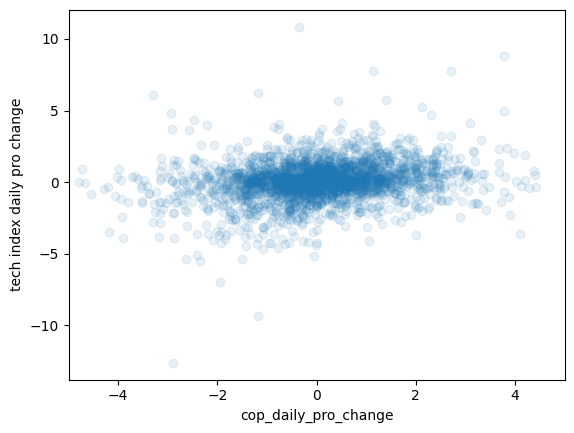

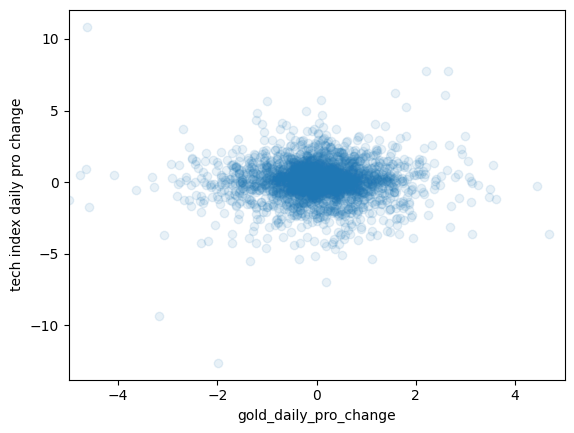

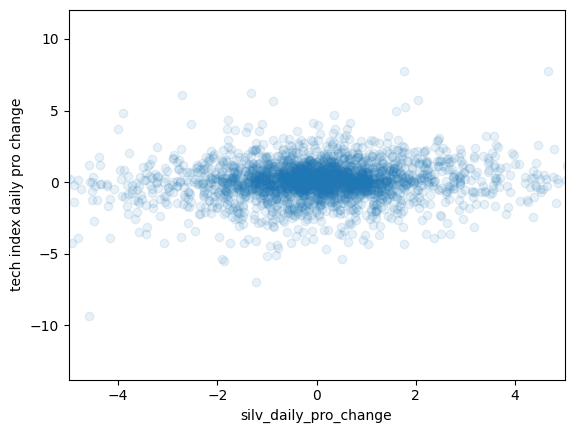

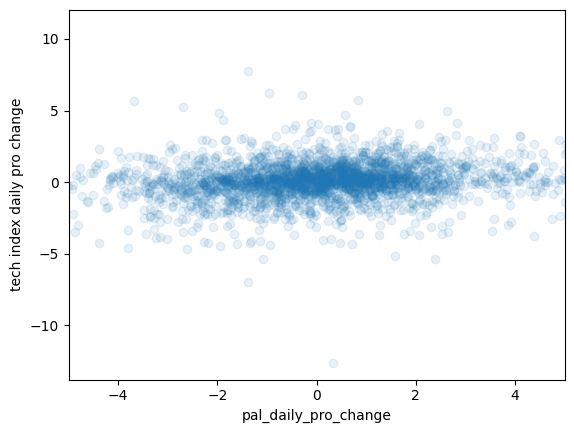

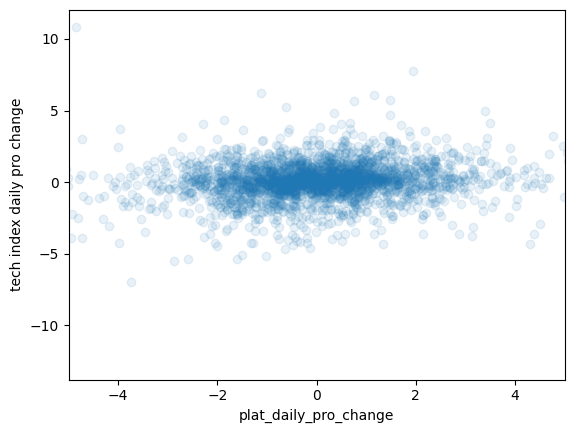

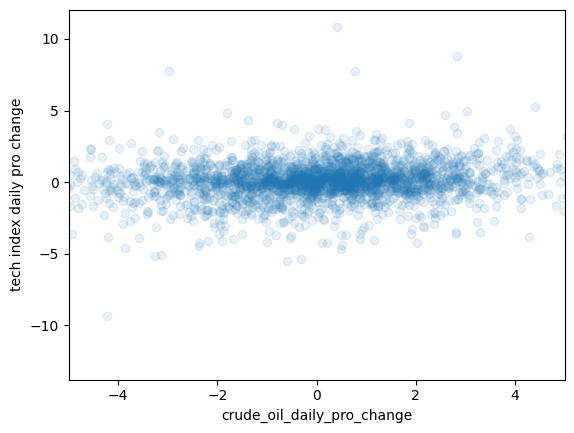

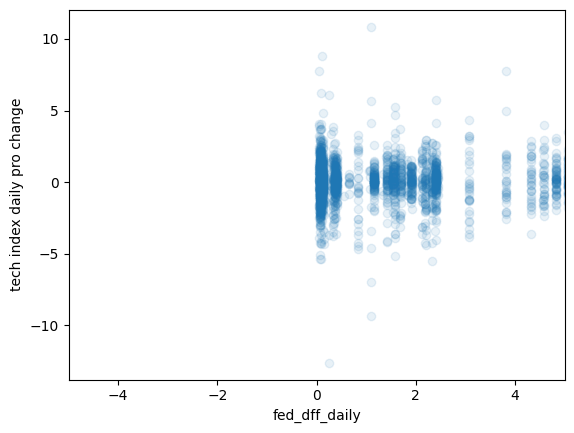

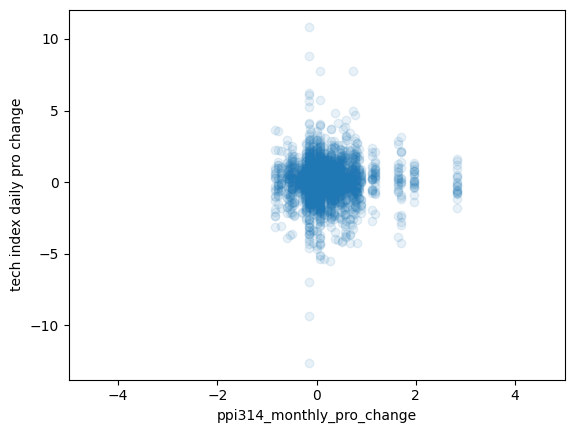

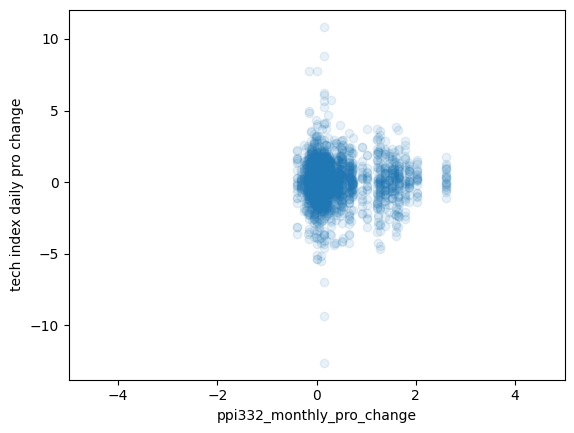

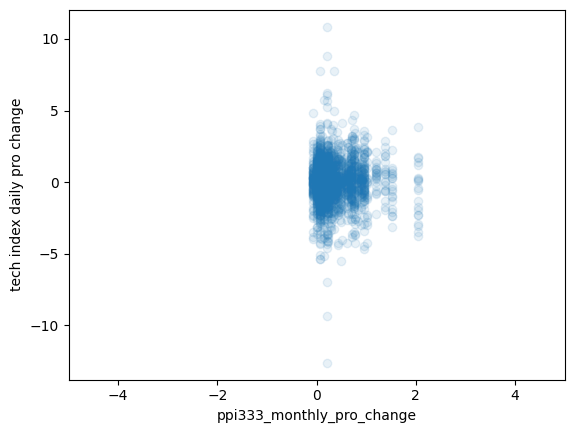

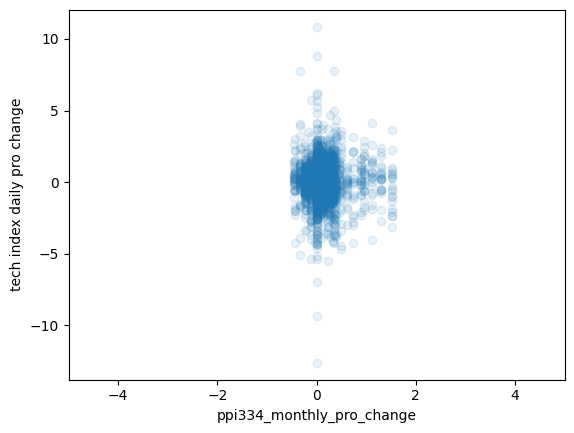

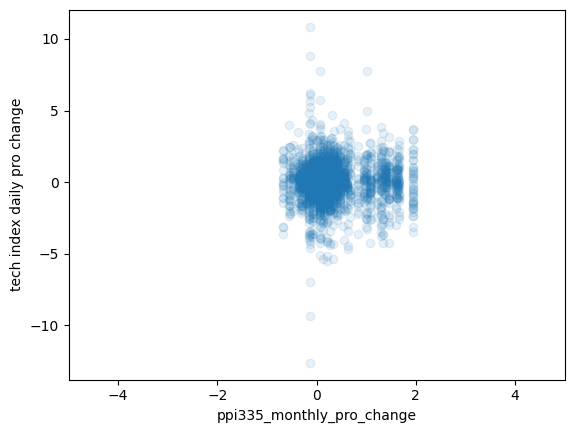

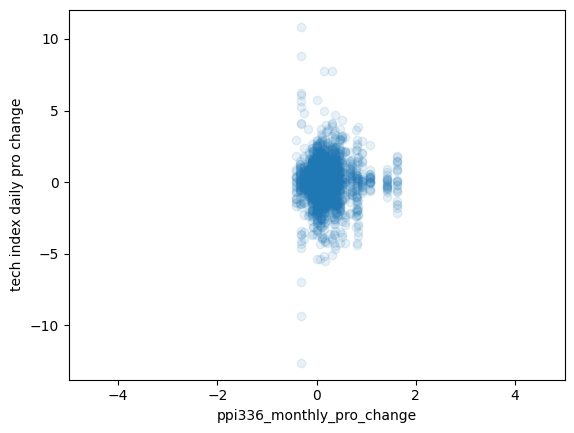

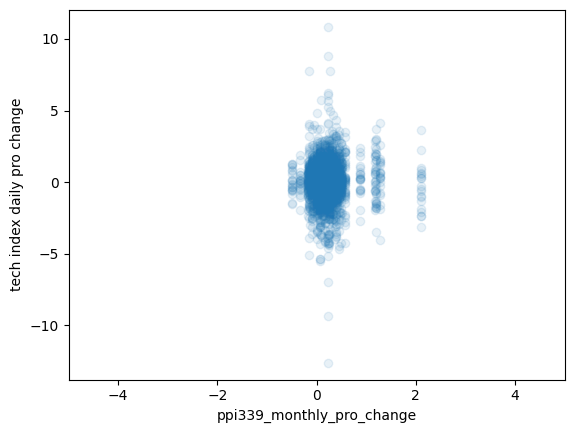

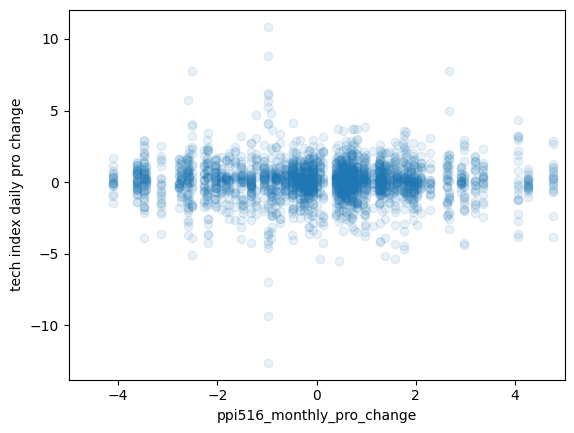

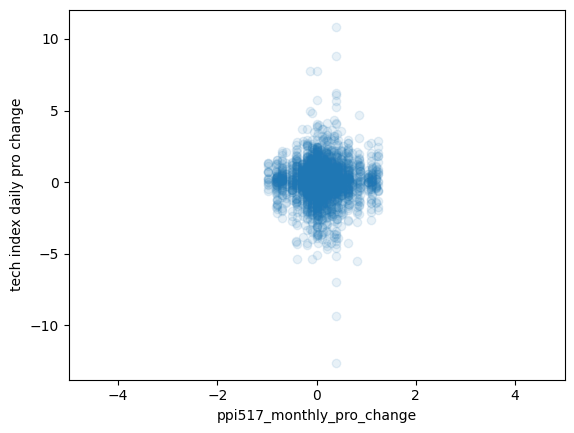

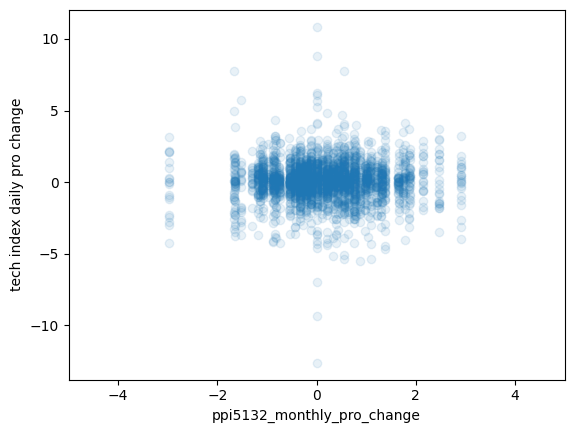

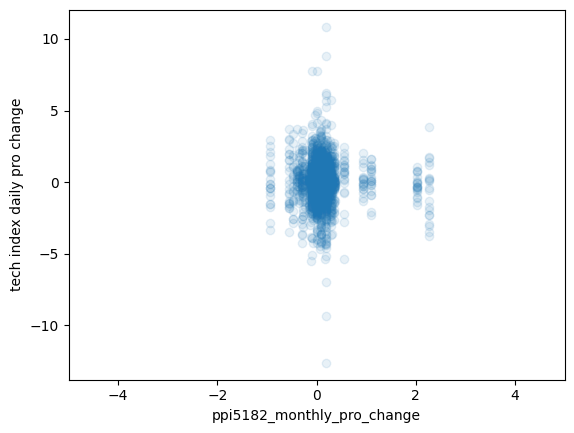

In [ ]:
for pram in lst_all_pram: 
    plt.scatter(x=df_collection[pram],y=lst_tech_daily, alpha=0.1)
    plt.xlabel(pram)
    plt.ylabel("tech index daily pro change")
    plt.xlim(-5,5)
    
    plt.show()

HMMMMMMMM, not very clear trends. 

In [33]:
import numpy as np

In [10]:
from interpret.glassbox import ExplainableBoostingRegressor

In [12]:
lst_prem_bounds={'cop_daily_pro_change': (-5,5),
       'gold_daily_pro_change':(-5,5), 'silv_daily_pro_change':(-5,5),
       'pal_daily_pro_change':(-5,5), 'plat_daily_pro_change':(-5,5),
       'crude_oil_daily_pro_change':(-5,5), 'fed_dff_daily':(-1,6)}

In [13]:
lst_targ_bounds={'cop_daily_pro_change': (-1,1),
       'gold_daily_pro_change':(-0.25,0.25), 'silv_daily_pro_change':(-0.5,0.5),
       'pal_daily_pro_change':(-0.5,0.5), 'plat_daily_pro_change':(-0.5,1),
       'crude_oil_daily_pro_change':(-0.75,0.75), 'fed_dff_daily':(-0.25,0.25)}

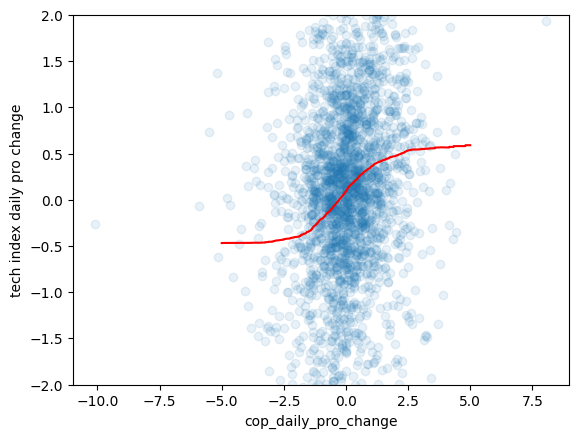

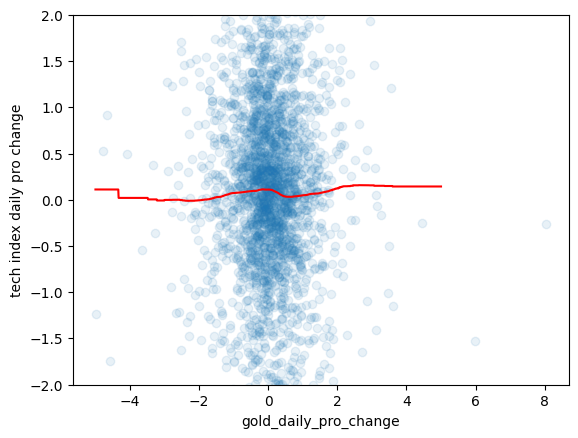

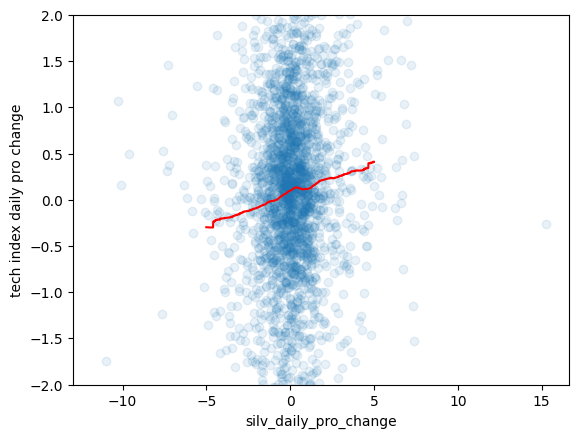

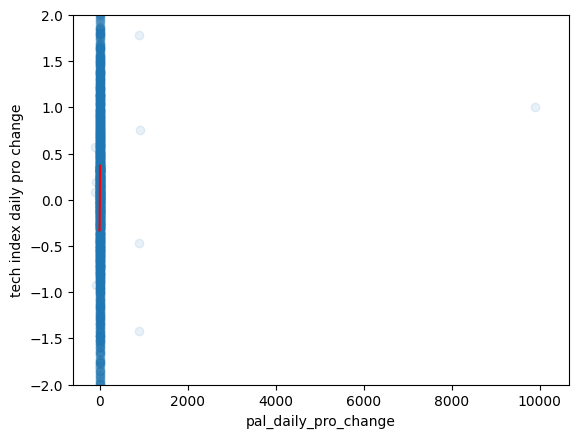

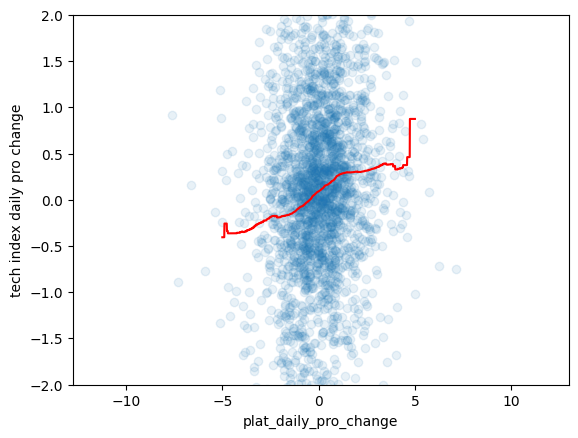

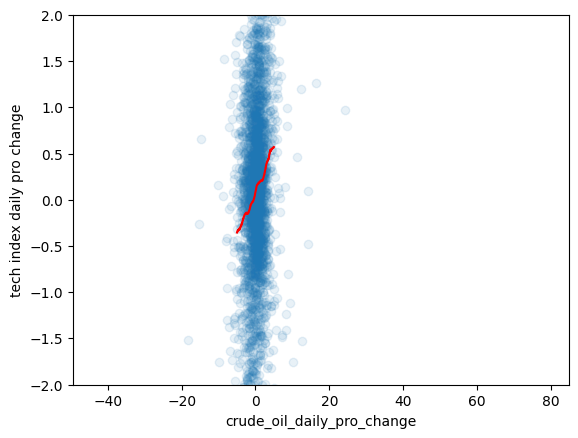

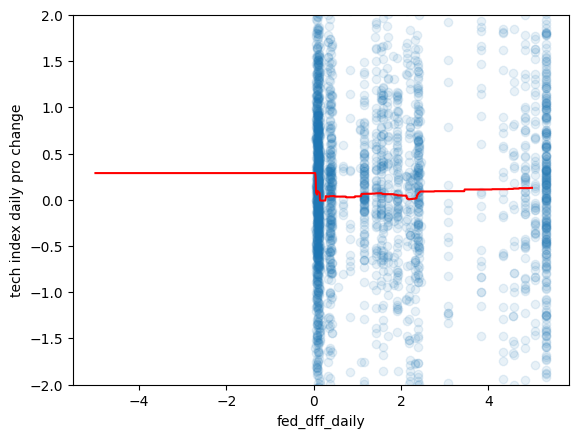

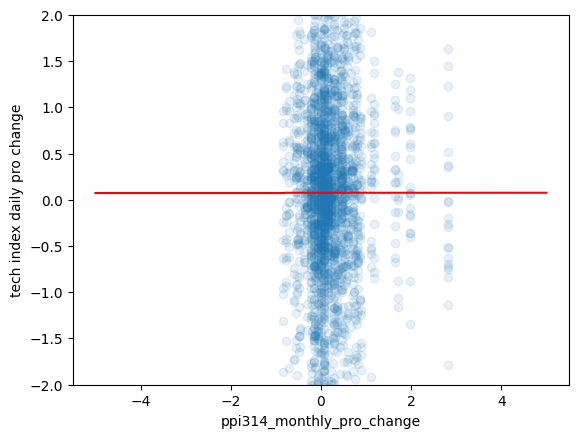

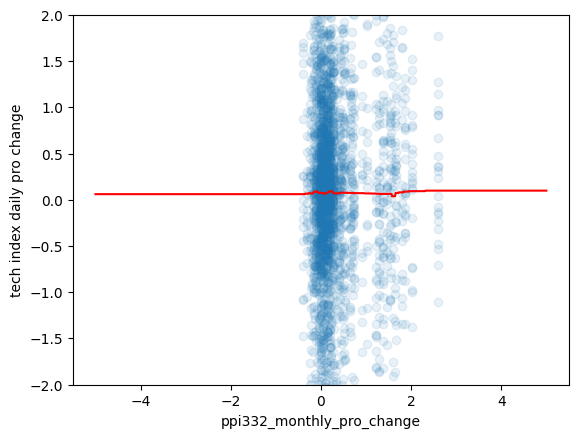

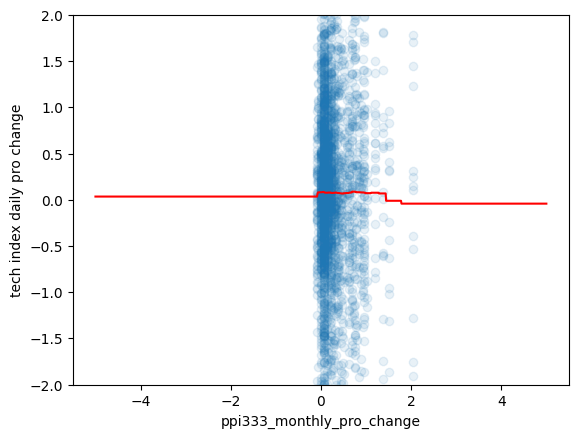

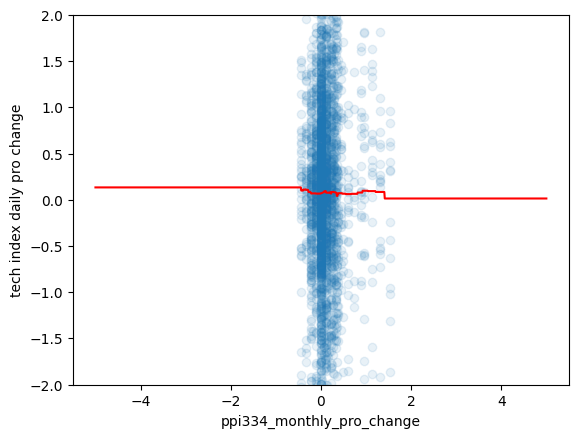

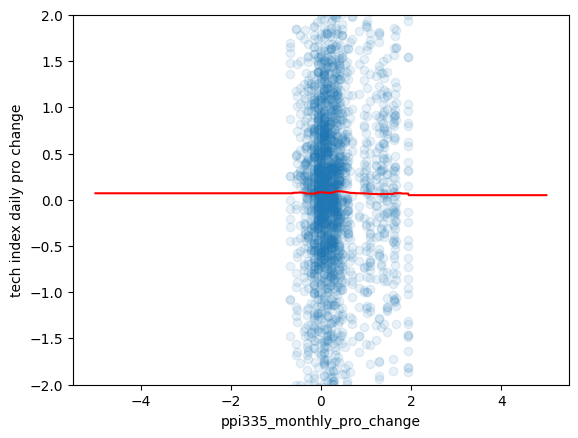

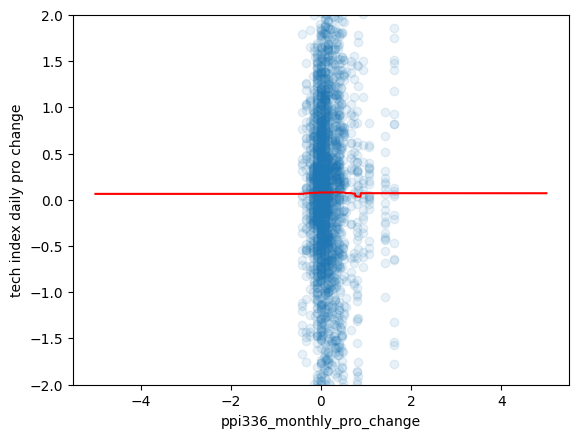

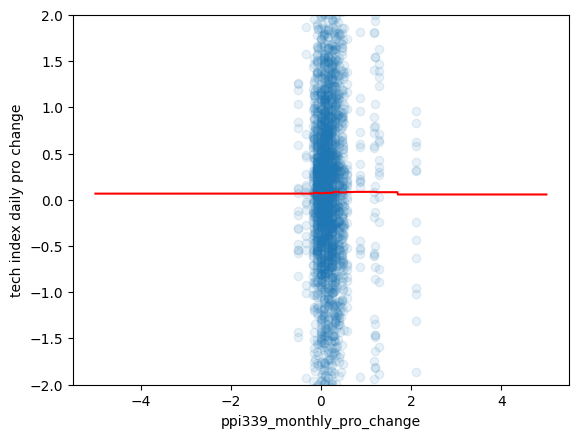

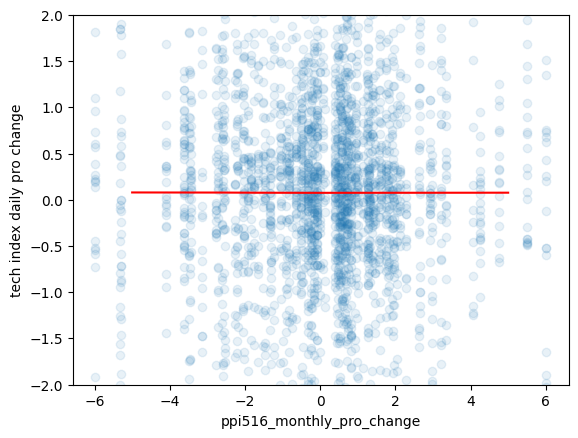

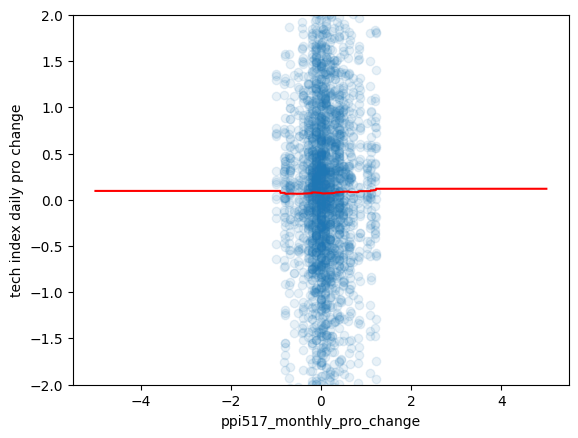

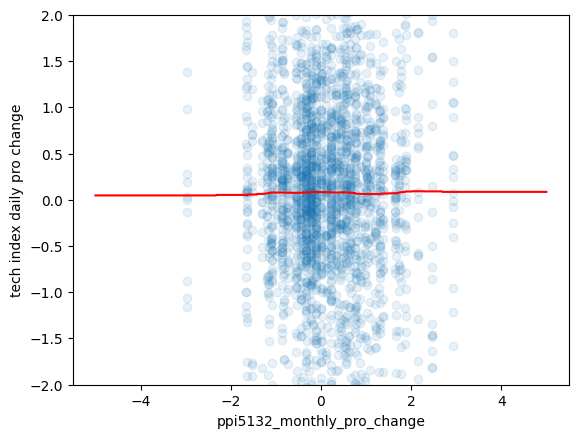

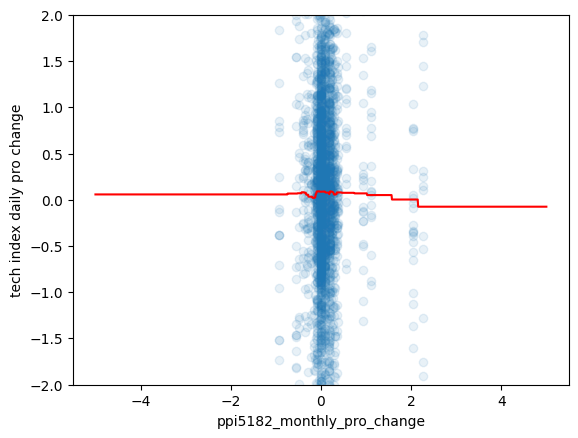

In [14]:
for pram in lst_all_pram: 
    ebm=ExplainableBoostingRegressor()
    ebm.fit(X=df_collection[pram].values.reshape(-1,1),y=lst_tech_daily.reshape(-1,1))
    # pred_in=np.linspace(lst_prem_bounds[pram][0],lst_prem_bounds[pram][1],num=1000)
    pred_in=np.linspace(-5,5,num=1000)
    pred=ebm.predict(pred_in)
    
    # plt.scatter(x=df_collection[pram],y=lst_tech_daily)
    
    plt.plot(pred_in, pred,c="r")
    
    plt.scatter(x=df_collection[pram],y=lst_tech_daily, alpha=0.1)
    plt.xlabel(pram)
    plt.ylabel("tech index daily pro change")
    # plt.xlim(lst_prem_bounds[pram])
    # plt.ylim(lst_targ_bounds[pram])
    plt.ylim(-2,2)
    
    plt.show()

There is certainly some kind of trend, just that the target is "too small". 

I hope I could find the prediction interval. I could not find a way to do this with EBM (with pre-made method), so I am going to try (Linear)GAM instead (tho the method of prediction interval change according to the change of parameter in consideration is unclear to me). 

In [21]:
from pygam import LinearGAM

In [19]:
gam=LinearGAM(n_splines=50)

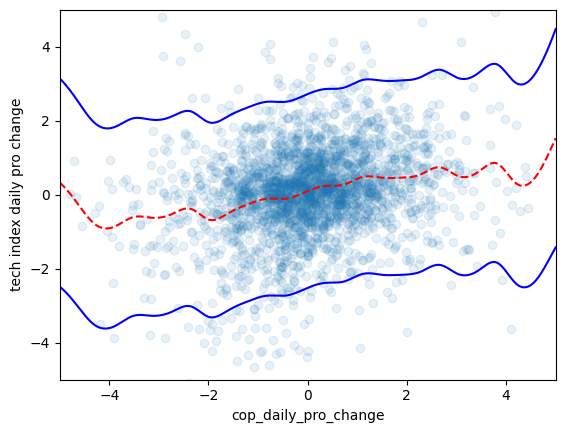

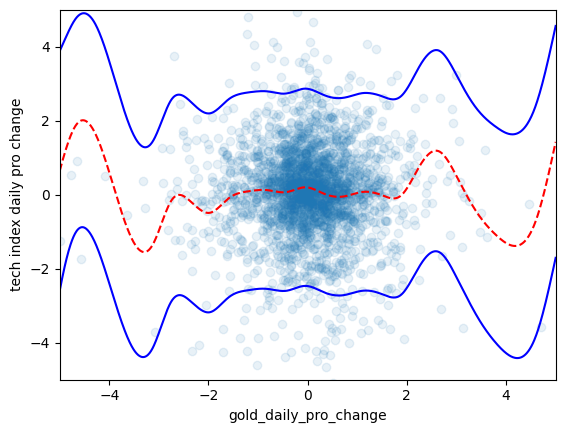

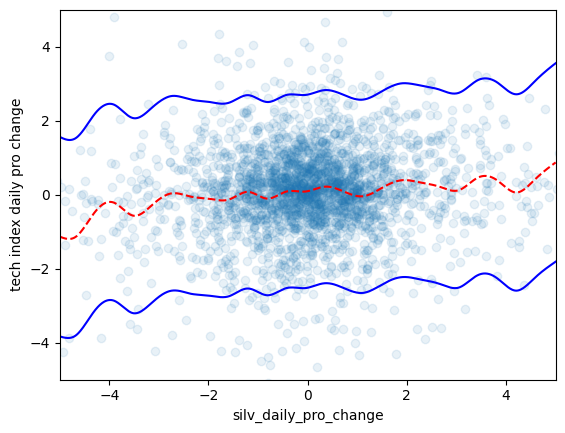

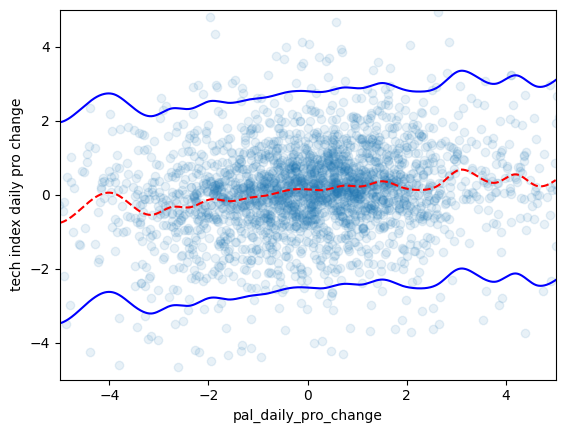

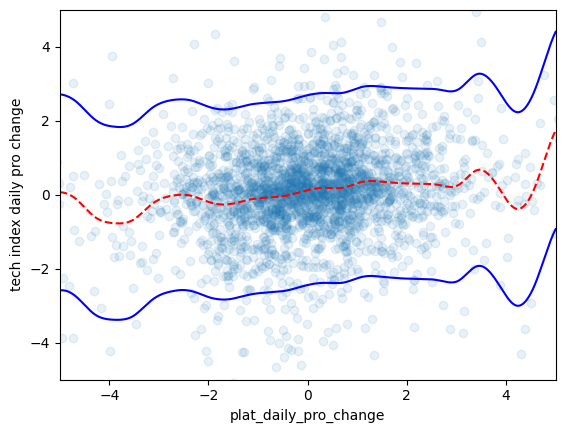

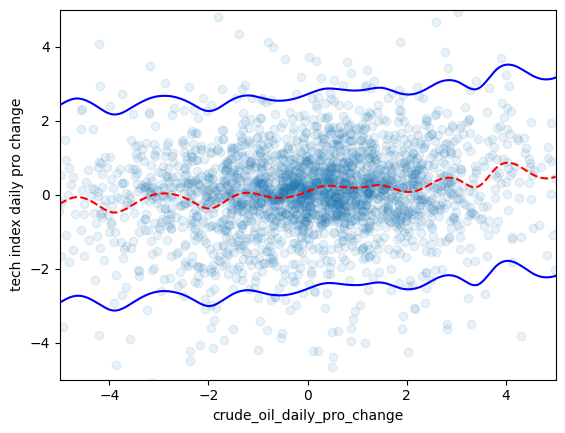

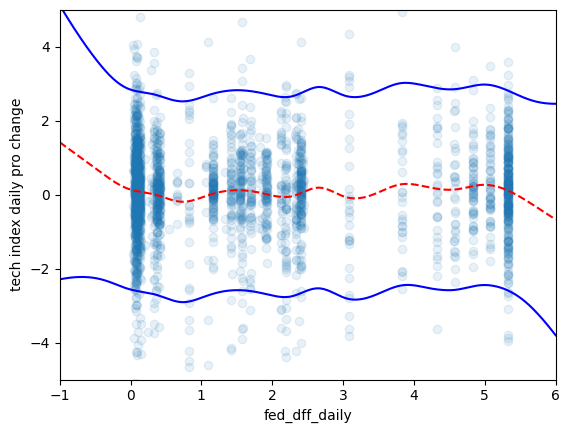

In [20]:
for pram in lst_all_pram: 
    gam.fit(X=df_collection[pram].values, y=lst_tech_daily)
    pred_in=np.linspace(lst_prem_bounds[pram][0],lst_prem_bounds[pram][1],1000)
    pred=gam.predict(pred_in)
    pred_95=gam.prediction_intervals(pred_in,width=0.95)
    
    plt.scatter(x=df_collection[pram],y=lst_tech_daily,alpha=0.1)
    plt.plot(pred_in,pred,"r--")
    plt.plot(pred_in,pred_95,color="b")
    plt.xlabel(pram)
    plt.ylabel("tech index daily pro change")
    plt.xlim(lst_prem_bounds[pram])
    plt.ylim(-5,5)
    
    plt.show()

Daily data relative the previous trading date seems to be completely bad to predict with our parameters, let's try 20 days prior instead (there are around 20 trading days in a month). 

In [1]:
import sys 
sys.path.append("../../")

In [2]:
from proj_mod import relative_period

In [6]:
df_20_prior=relative_period.create_rela_day_data(int_rela_day=20,str_path="../../data/processed/all_data_collection.csv")

In [7]:
df_20_prior

Date  fed_dff_daily  ppi314_monthly_pro_change  \
0    2014-01-02           0.08                   2.827965   
1    2014-01-03           0.08                   2.827965   
2    2014-01-06           0.08                   2.827965   
3    2014-01-07           0.07                   2.827965   
4    2014-01-08           0.07                   2.827965   
...         ...            ...                        ...   
2563 2024-10-24           4.83                  -0.554093   
2564 2024-10-25           4.83                  -0.554093   
2565 2024-10-28           4.83                  -0.554093   
2566 2024-10-29           4.83                  -0.554093   
2567 2024-10-30           4.83                  -0.554093   

      ppi332_monthly_pro_change  ppi333_monthly_pro_change  \
0                      0.267809                   0.389105   
1                      0.267809                   0.389105   
2                      0.267809                   0.389105   
3                      0.267809                   0.389105   
4                      0.267809                   0.389105   
...                         ...                        ...   
2563                   0.212418                   0.164483   
2564                   0.212418                   0.164483   
2565                   0.212418                   0.164483   
2566                   0.212418                   0.164483   
2567                   0.212418                   0.164483   

      ppi334_monthly_pro_change  ppi335_monthly_pro_change  \
0                      0.000000                   0.215983   
1                      0.000000                   0.215983   
2                      0.000000                   0.215983   
3                      0.000000                   0.215983   
4                      0.000000                   0.215983   
...                         ...                        ...   
2563                   0.331433                  -0.163805   
2564                   0.331433                  -0.163805   
2565                   0.331433                  -0.163805   
2566                   0.331433                  -0.163805   
2567                   0.331433                  -0.163805   

      ppi336_monthly_pro_change  ppi339_monthly_pro_change  \
0                      0.255319                   0.252738   
1                      0.255319                   0.252738   
2                      0.255319                   0.252738   
3                      0.255319                   0.252738   
4                      0.255319                   0.252738   
...                         ...                        ...   
2563                   0.341572                   0.285758   
2564                   0.341572                   0.285758   
2565                   0.341572                   0.285758   
2566                   0.341572                   0.285758   
2567                   0.341572                   0.285758   

      ppi516_monthly_pro_change  ppi517_monthly_pro_change  \
0                      1.972556                   0.000000   
1                      1.972556                   0.000000   
2                      1.972556                   0.000000   
3                      1.972556                   0.000000   
4                      1.972556                   0.000000   
...                         ...                        ...   
2563                   0.939593                   0.657165   
2564                   0.939593                   0.657165   
2565                   0.939593                   0.657165   
2566                   0.939593                   0.657165   
2567                   0.939593                   0.657165   

      ppi5132_monthly_pro_change  ppi5182_monthly_pro_change  \
0                      -0.108460                    0.000000   
1                      -0.108460                    0.000000   
2                      -0.108460                    0.000000   
3                      -0.108460          

In [15]:
df_20_prior.columns

Index(['Date', 'fed_dff_daily', 'ppi314_monthly_pro_change',
       'ppi332_monthly_pro_change', 'ppi333_monthly_pro_change',
       'ppi334_monthly_pro_change', 'ppi335_monthly_pro_change',
       'ppi336_monthly_pro_change', 'ppi339_monthly_pro_change',
       'ppi516_monthly_pro_change', 'ppi517_monthly_pro_change',
       'ppi5132_monthly_pro_change', 'ppi5182_monthly_pro_change',
       'tech_index_20days_prior_pro_change', 'cop_20days_prior_pro_change',
       'gold_20days_prior_pro_change', 'silv_20days_prior_pro_change',
       'pal_20days_prior_pro_change', 'plat_20days_prior_pro_change',
       'crude_oil_20days_prior_pro_change'],
      dtype='object')

In [57]:
lst_pram_limit={'fed_dff_daily':(-0.1,6), 'ppi314_monthly_pro_change':(-1,2.5),
       'ppi332_monthly_pro_change':(-0.5,3), 'ppi333_monthly_pro_change':(-0.25,2.5),
       'ppi334_monthly_pro_change':(-0.5,1.75), 'ppi335_monthly_pro_change':(-1,2),
       'ppi336_monthly_pro_change':(-0.5,1.75), 'ppi339_monthly_pro_change':(-0.5,1),
       'ppi516_monthly_pro_change':(-6,6), 'ppi517_monthly_pro_change':(-1,1.5),
       'ppi5132_monthly_pro_change':(-2,3), 'ppi5182_monthly_pro_change':(-1,1.5),'cop_20days_prior_pro_change':(-20,20),
       'gold_20days_prior_pro_change':(-10,10), 'silv_20days_prior_pro_change':(-20,20),
       'pal_20days_prior_pro_change':(-20,20), 'plat_20days_prior_pro_change':(-20,20),
       'crude_oil_20days_prior_pro_change':(-20,20)}

In [39]:
gam=LinearGAM(n_splines=120)

In [26]:
df_20_prior=df_20_prior.dropna()

In [53]:
df_20_try=df_20_prior[df_20_prior['Date']<="2024-01-01"]

In [54]:
lst_tech_20_try=df_20_try["tech_index_20days_prior_pro_change"]

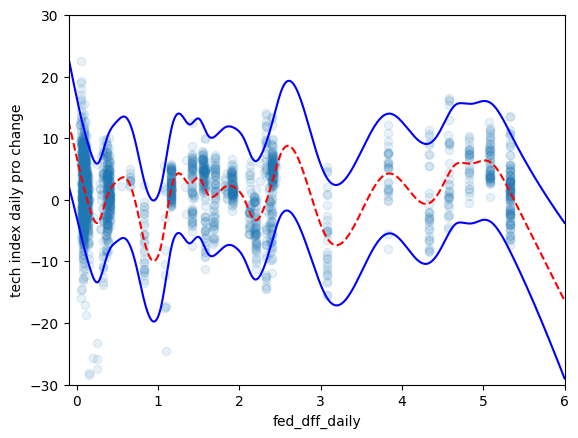

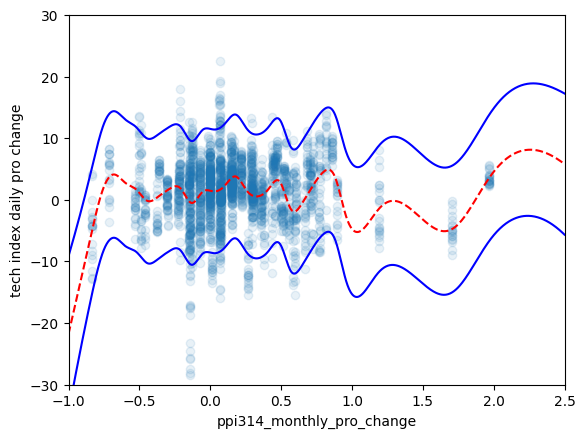

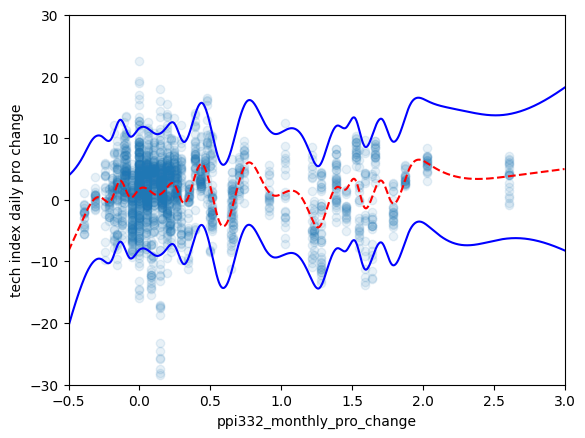

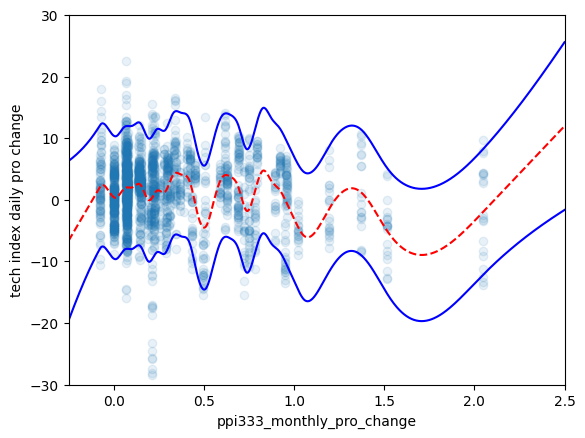

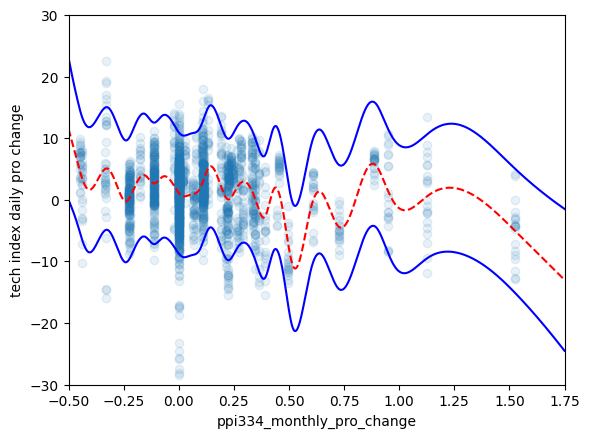

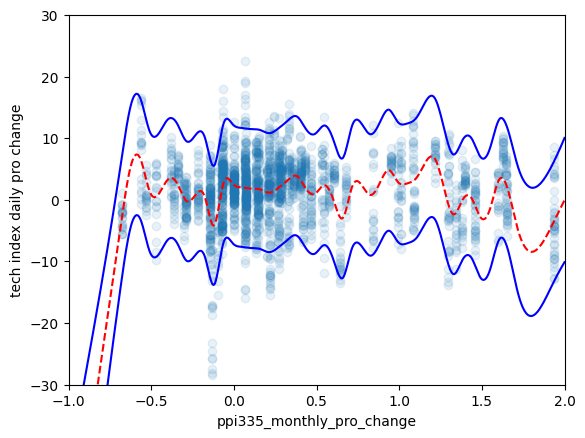

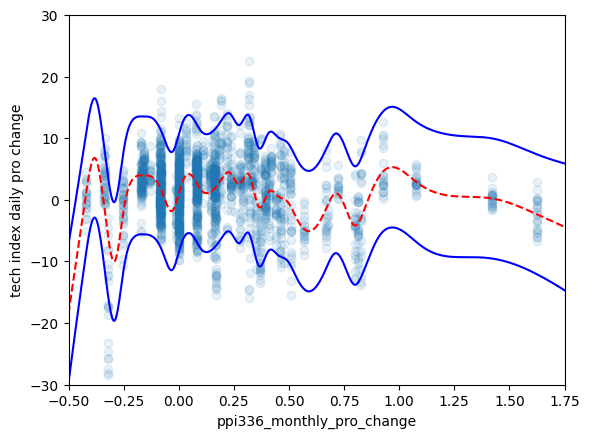

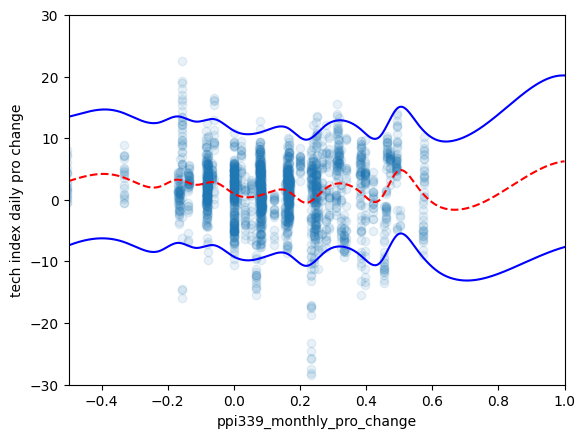

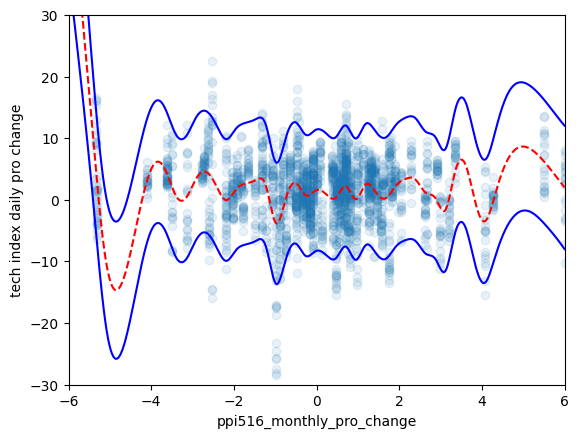

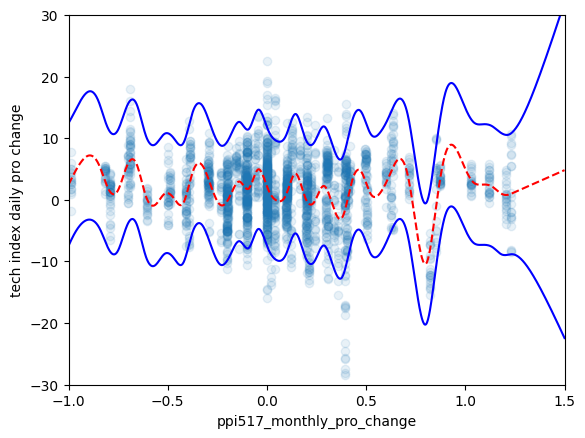

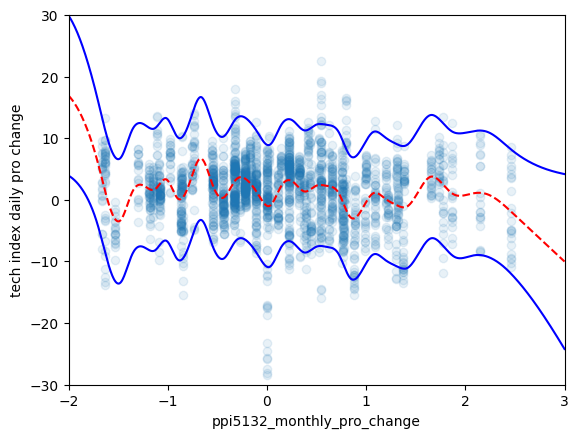

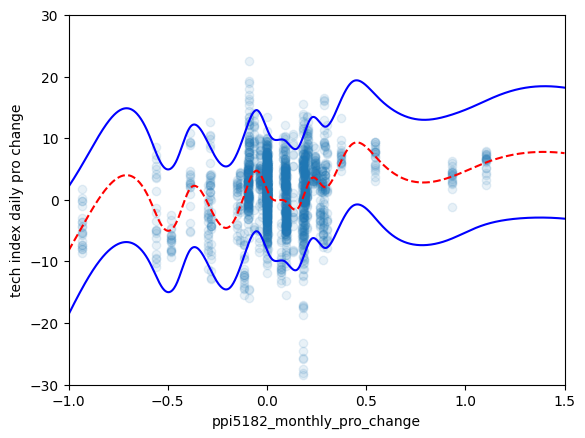

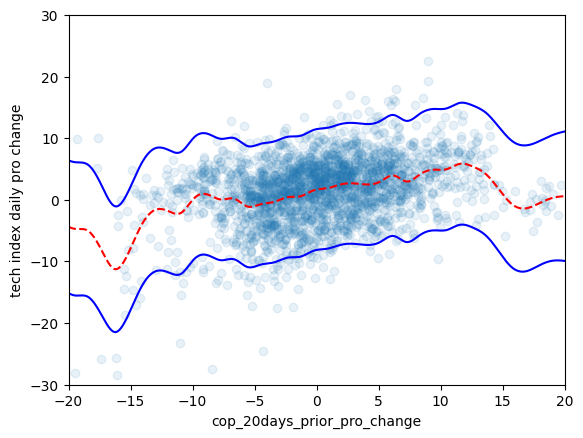

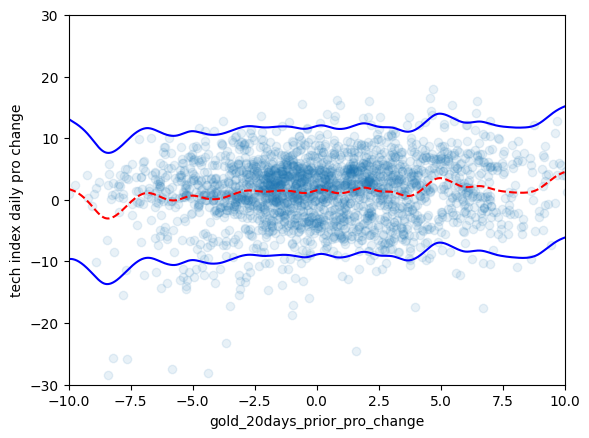

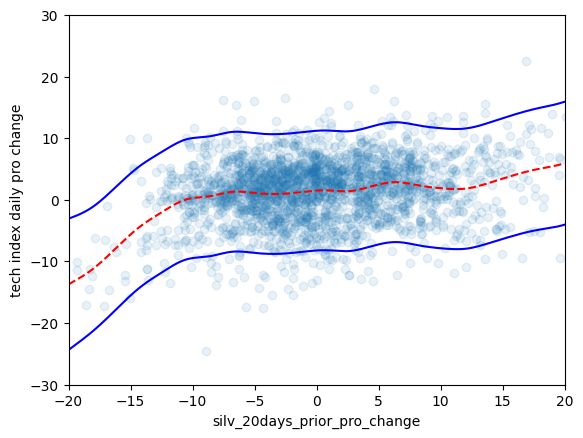

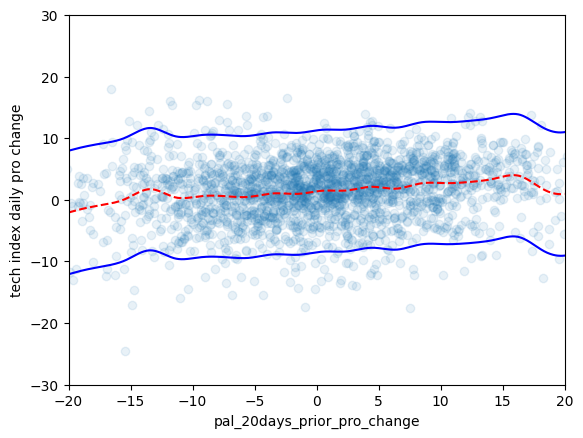

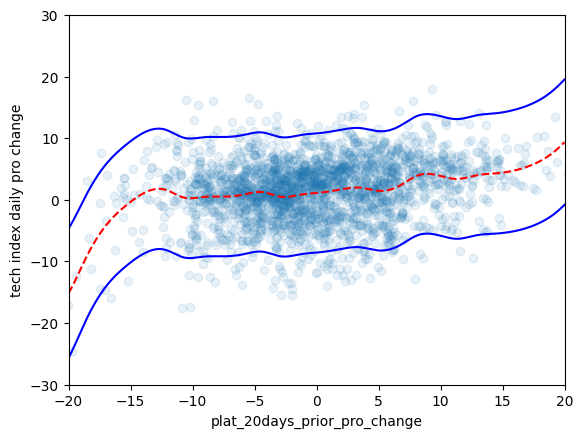

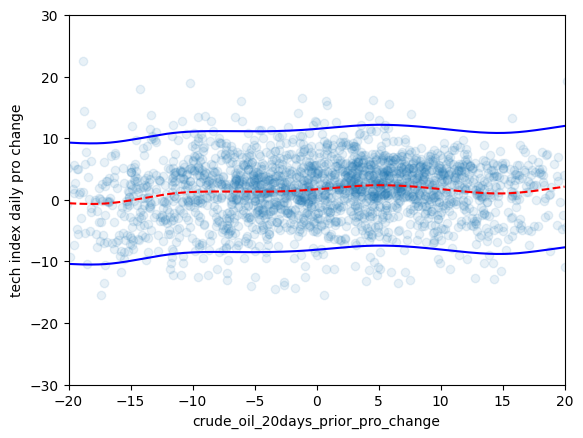

In [58]:
for pram in df_20_prior.columns[1:]: 
    if pram != 'tech_index_20days_prior_pro_change': 
        gam=LinearGAM(n_splines=50)
        gam.fit(X=df_20_try[pram].values, y=lst_tech_20_try)
        pred_in=np.linspace(lst_pram_limit[pram][0],lst_pram_limit[pram][1],1000)
        # print(lst_pram_limit[pram][0],lst_pram_limit[pram][1])
        pred=gam.predict(pred_in)
        pred_95=gam.prediction_intervals(pred_in,width=0.95)
        plt.scatter(x=df_20_try[pram],y=lst_tech_20_try, alpha=0.1)
        plt.plot(pred_in,pred,"r--")
        plt.plot(pred_in,pred_95,color="b")
        plt.xlabel(pram)
        plt.ylabel("tech index daily pro change")
        plt.ylim(-30,30)
        # plt.xlim(-5,5)
        plt.xlim(lst_pram_limit[pram])
        plt.show()
    